## Import libraries and dataset

In [154]:
import numpy as np
import pandas as pd

In [155]:
df = pd.read_csv('house_prices_data.csv')
df.head(3)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570


In [156]:
df.tail(3)

,Id,SalePrice
1456,2917,219222.423400
1457,2918,184924.279659
1458,2919,187741.866657


In [157]:
df_train = pd.read_csv('house_prices_train.csv')
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [158]:
df_train.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [159]:
df_test = pd.read_csv('house_prices_test.csv')
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [160]:
df_test.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [161]:
# checking the number of rows and columns in the training data set
df_train.shape

(1460, 81)

## Missing Data 

In [162]:
# check the count and percentage of missing data per feature:
total_missing = df_train.isnull().sum().sort_values(ascending=False)
total_missing.head()
#total_missing.name = 'Total'
#missing_data = pd.DataFrame(total_missing)
#missing_data.head()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [163]:
percent_missing = total_missing / df_train.shape[0]
percent_missing.head()

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64

In [164]:
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


## Exploring the Dataset 

In [165]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [166]:
# Focus especially on dependent variable:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

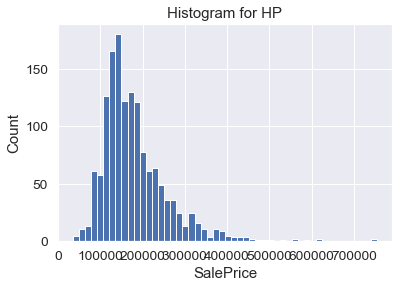

In [167]:
# Histogram of SalePrice:
import matplotlib.pyplot as plt # plotting
df_train.SalePrice.hist(bins=50)
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Histogram for HP');

In [168]:
# check for normal distribution
import numpy as np
from numpy.random import normal
from scipy.stats import norm

In [169]:
norm.fit(df_train.SalePrice)

(180921.19589041095, 79415.29188606751)

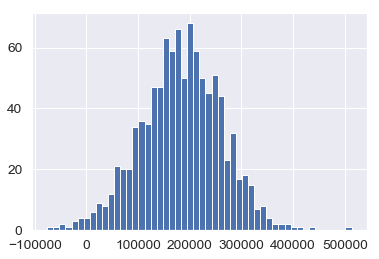

In [170]:
μ = 180921.196
σ = 79415.292
pd.Series(normal(loc=μ, scale=σ, size=1000)).hist(bins=50);

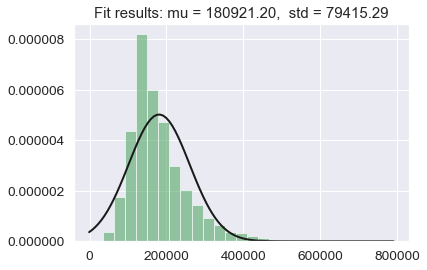

In [171]:
# Plot the histogram.
plt.hist(df_train.SalePrice, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)
plt.title(title);

# From class lab 3.2

C:\Users\kacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


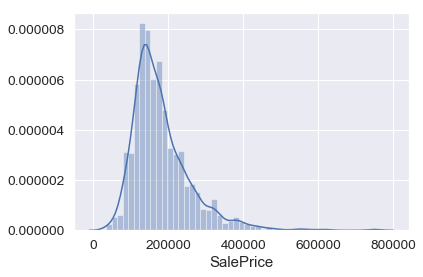

In [172]:
#Plotting a histogram using Seaborn - to check 
import seaborn as sns
sns.distplot(df_train.SalePrice);

In [173]:
#measure the house sales price curve characteristics: skewness and kurtosis
print("Skewness: %f" % df_train.SalePrice.skew())
print("Kurtosis: %f" % df_train.SalePrice.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


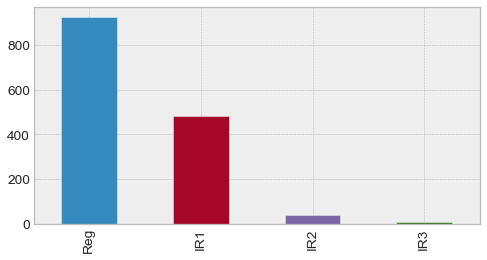

In [174]:
# Plotting a bar chart for categorical value = Lot shape
# Categorical variables are variables we can count, like say lot shape.
# Numerical variables will be something like price.

with plt.style.context('bmh'):
    plt.figure(figsize=(8,4))
    df_train.LotShape.value_counts().plot(kind='bar');

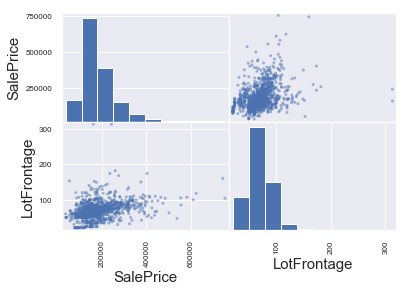

In [150]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_train[["SalePrice", "LotFrontage"]],
               diagonal='hist');

## Correlation matrix (Heat map)

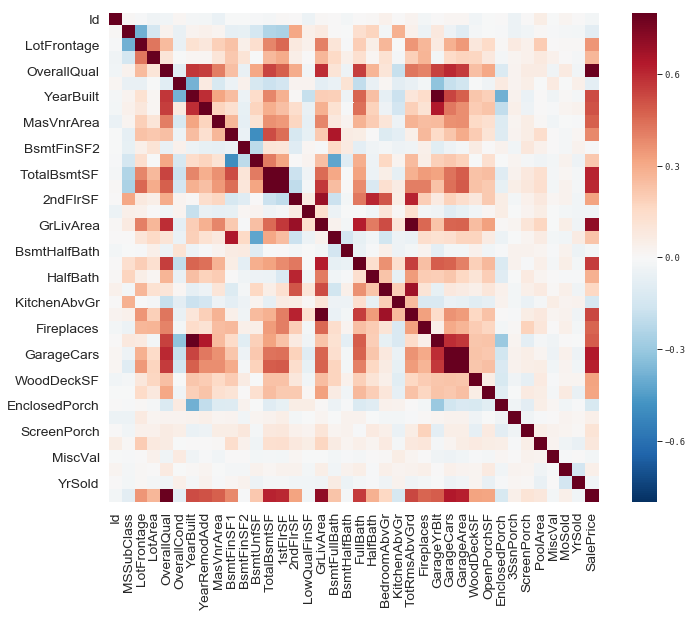

In [151]:
#http://seaborn.pydata.org/examples/many_pairwise_correlations.html
#http://seaborn.pydata.org/examples/network_correlations.html

# calculate the correaltion matrix in numbers
corrmat = df_train.corr()  

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, n=9, center='light', as_cmap=True)  # (220, 10, as_cmap=True)

# Drawing the heatmap using seaborn (vmax/vmin: Values to anchor the colormap; square: shape of cells)
sns.set(context="paper", font="monospace")
sns.heatmap(corrmat, vmax=.8, vmin=-.8, cmap = 'RdBu_r', # = cmap,
            square=True);

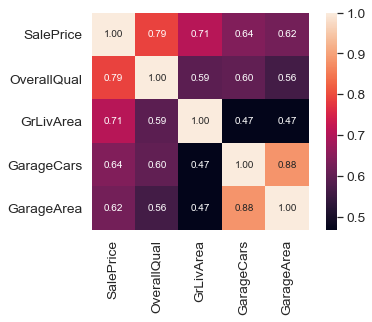

In [175]:
# saleprice correlation matrix with only k variables for heatmap: Elis code
k = 5
cols = corrmat.nlargest(k, 'SalePrice').index   # return k columns with largest correlation with SalePrices
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

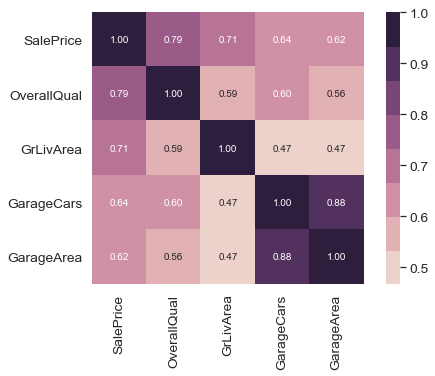

In [198]:
# saleprice correlation matrix with only k variables for heatmap: my code
k = 5
cols = corrmat.nlargest(k, 'SalePrice').index   # return k columns with largest correlation with SalePries
corrmat_k = df_train[cols].corr()
sns.set(font_scale=1.25)
cmap = sns.cubehelix_palette(8)
plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat_k, fmt='.2f', cmap = cmap, annot=True, square=True, annot_kws={'size': 10});

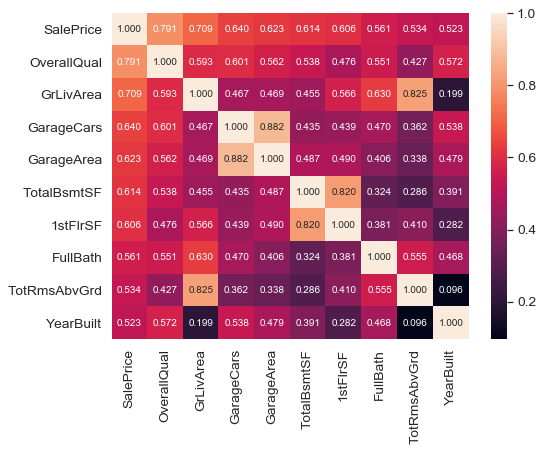

In [201]:
#Annotated heatmap to associate values to the variables
#https://seaborn.pydata.org/examples/heatmap_annotation.html

k = 10 
cols = corrmat.nlargest(k, 'SalePrice').index
corrmat_k = df_train[cols].corr()
sns.set(font_scale=1.25)
plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat_k,annot=True, fmt='.3f', annot_kws={'size': 10})
plt.show()

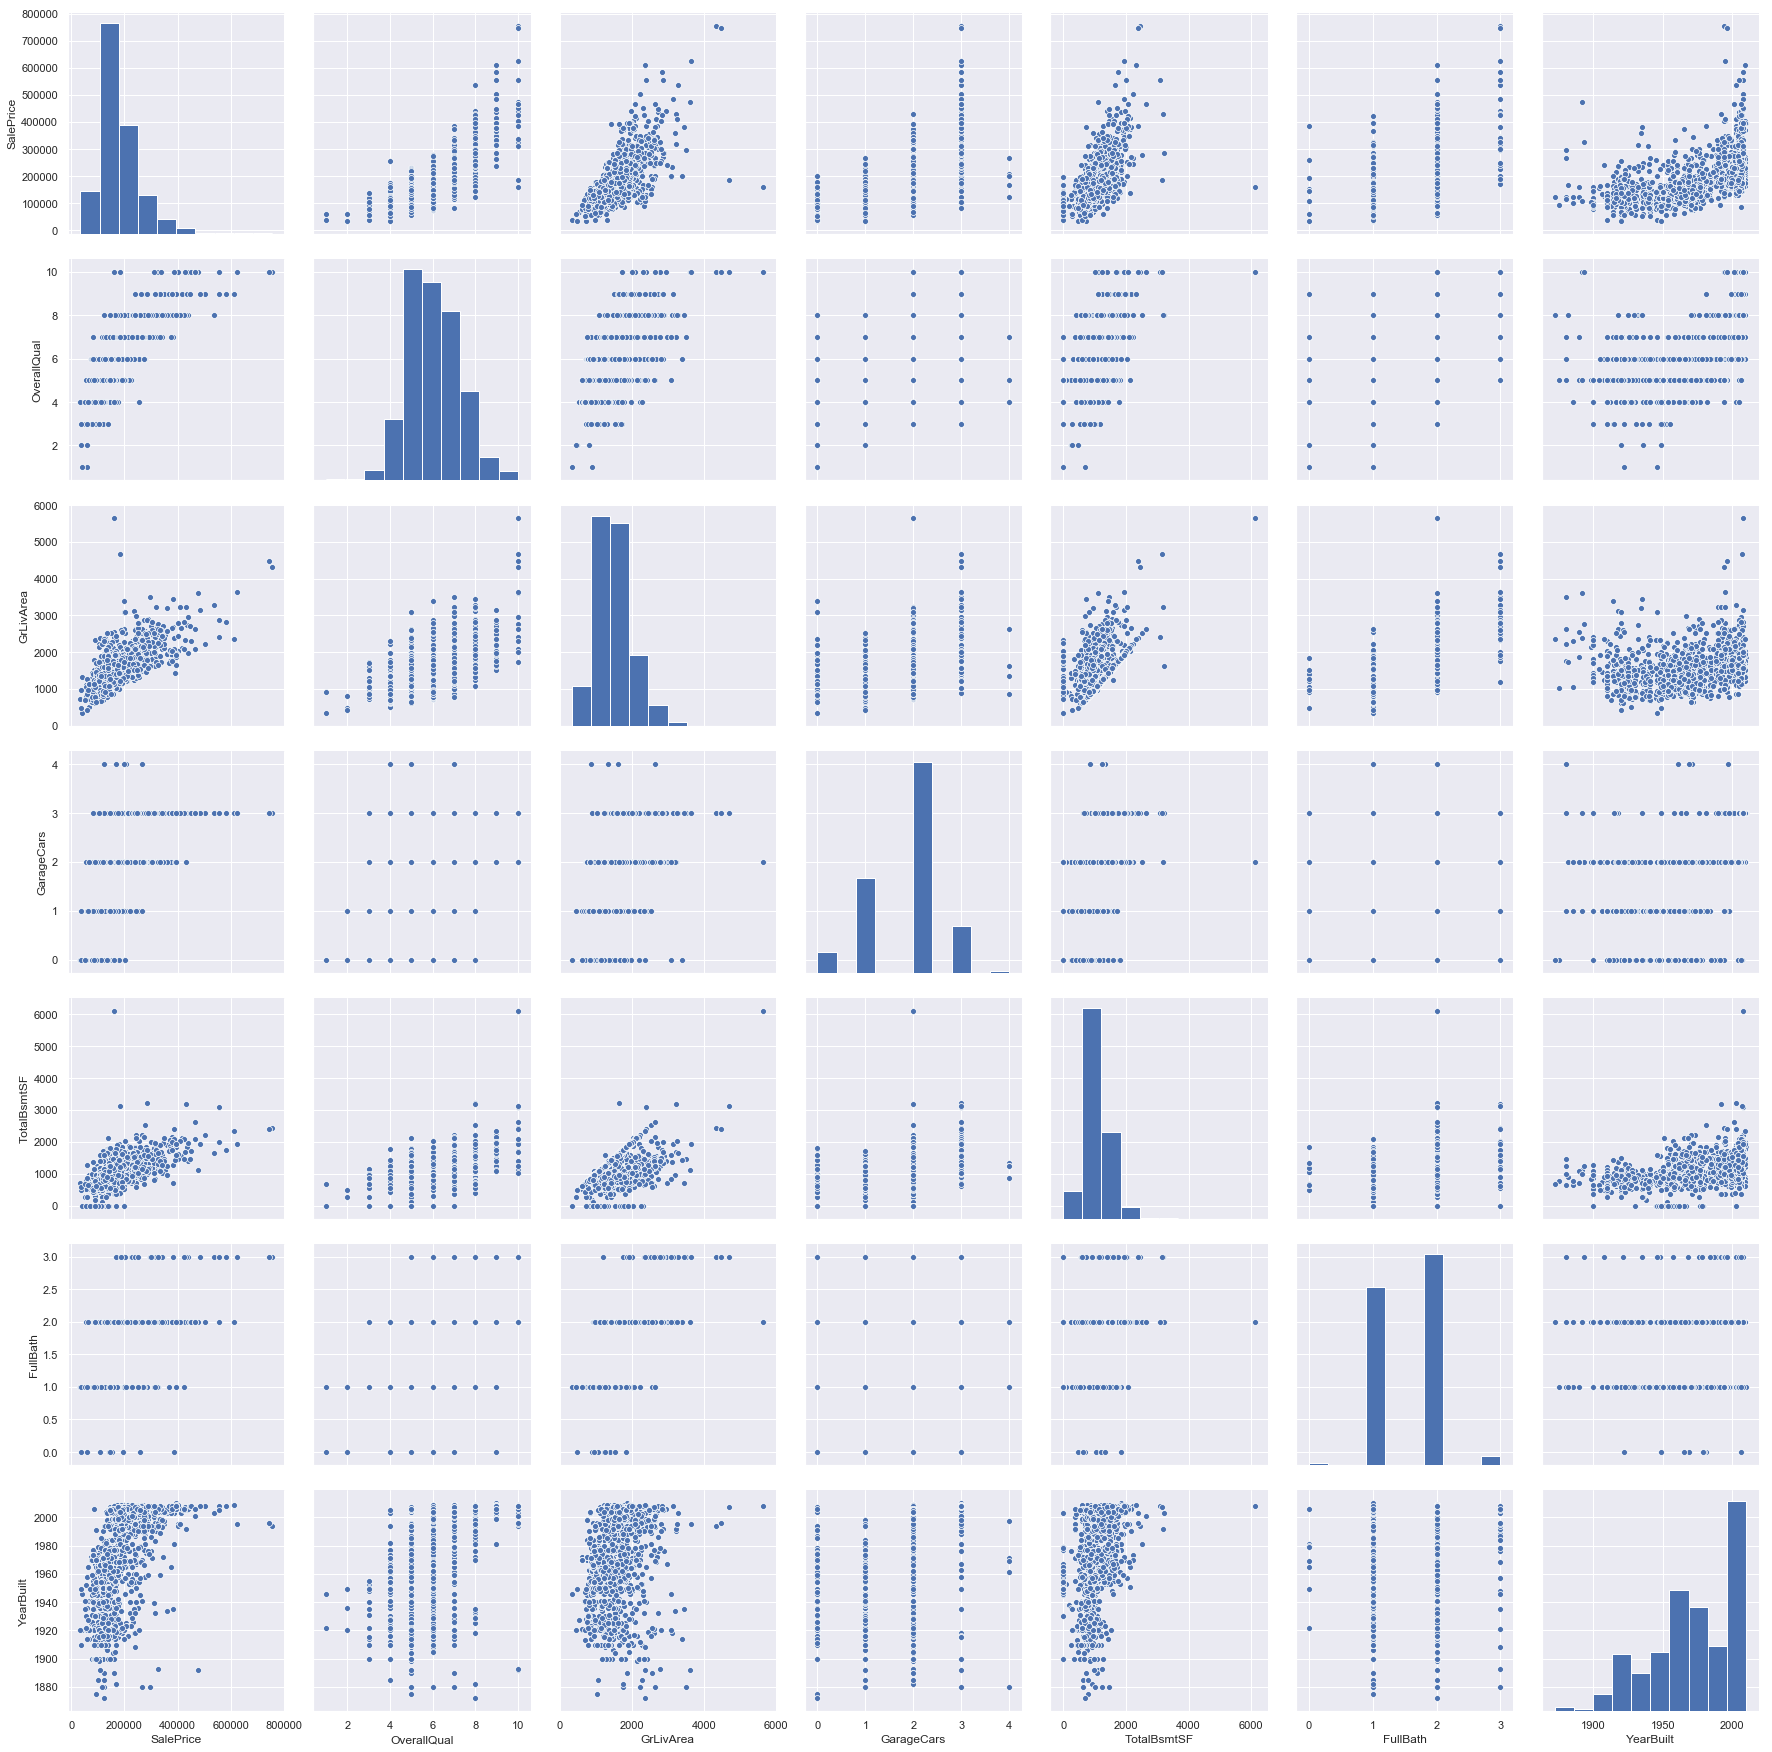

In [203]:
#Scatterplot
#https://seaborn.pydata.org/examples/scatterplot_matrix.html

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 3.5)
plt.show();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


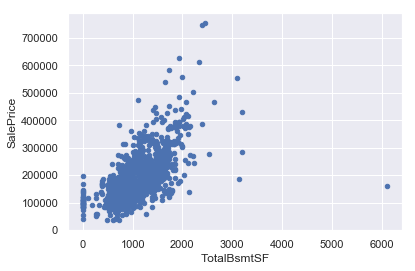

In [210]:
#scatter plot totalbsmtsf/saleprice
#var = 'TotalBsmtSF'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
#data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

df_train.plot(x='TotalBsmtSF', y='SalePrice', kind='scatter');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


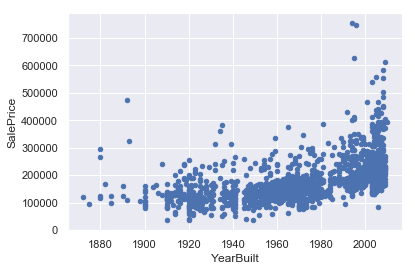

In [208]:
df_train.plot(x='YearBuilt', y='SalePrice', kind='scatter');

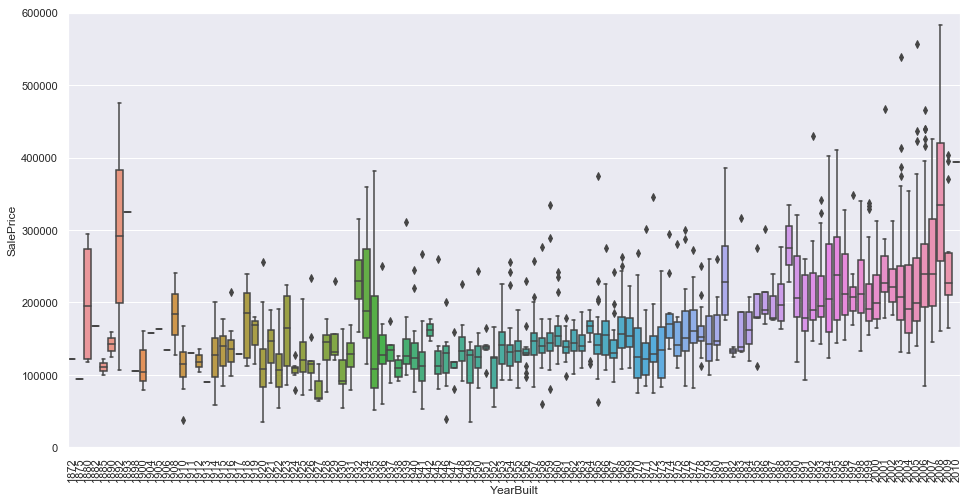

In [215]:
# box plot overallqual/saleprice
#http://www.physics.csbsju.edu/stats/box2.html
#http://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

var = 'YearBuilt'  # 'OverallQual' 
#data = pd.concat([df_houseprices['SalePrice'], df_houseprices[var]], axis=1)

f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x=var, y="SalePrice", data=df_train)
plt.axis(ymin=0, ymax=600000);
plt.xticks(rotation=90);

## Linear Regression 

In [216]:
import statsmodels.api as sms

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


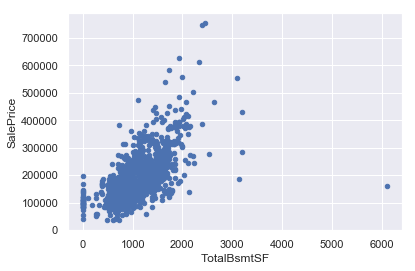

In [217]:
df_train.plot(x='TotalBsmtSF', y='SalePrice', kind='scatter');

In [218]:
X = df_train.TotalBsmtSF
X = sms.add_constant(X)
y = df_train.SalePrice

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     880.3
Date:                Sun, 27 Oct 2019   Prob (F-statistic):          9.48e-152
Time:                        13:45:51   Log-Likelihood:                -18199.
No. Observations:                1460   AIC:                         3.640e+04
Df Residuals:                    1458   BIC:                         3.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.343e+04   4286.892     14.796      0.000     5.5e+04    7.18e+04
TotalBsmtSF   111.1096      3.745     29.671      0.000     103.764     118.455
==============================================================================
Omnibus:                      386.381   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5810.518
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      12.638   Cond. No.                     2.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* $R^2$: The model explains 37.6% of the variability of Saleprice (y).

* $\hat{\beta}_0$: If we don't have any Totalbasemnt factor in the picture, we would expect Saleprice (y) to be 6.34 exponentially raised to power of 4. In other words it is very small.

* $\hat{\beta}_{TotalBsmtSF}$: For each unit (square feet) increase in TotalBsmtSF (x) ~~&#36;1,000 increase in Saleprice~~, Saleprice (y) increases by 111 on average.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


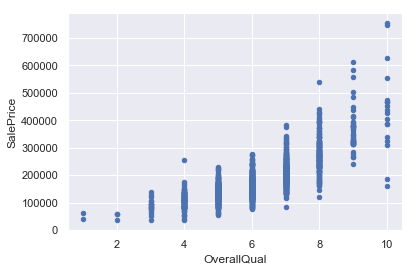

In [220]:
df_train.plot(x='OverallQual', y='SalePrice',kind='scatter');

In [223]:
X = df_train.OverallQual
X = sms.add_constant(X)
y = df_train.SalePrice

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):          2.19e-313
Time:                        13:59:39   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* $R^2$: The model explains 62.6% of the variability of Saleprice (y).

* $\hat{\beta}_0$: If we don't have any Overallquality factor in the picture, we would expect Saleprice (y) to be -9.621 exponentially raised to power of 4. In other words it is very small.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


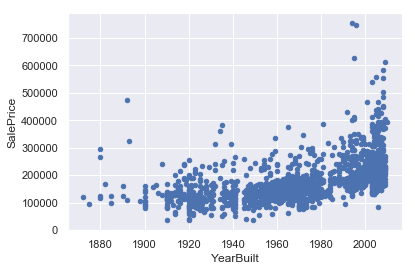

In [224]:
df_train.plot(x='YearBuilt',y='SalePrice',kind='scatter');

In [225]:
X = df_train.YearBuilt
X = sms.add_constant(X)
y = df_train.SalePrice

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Sun, 27 Oct 2019   Prob (F-statistic):          2.99e-103
Time:                        14:01:09   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.000   -2.76e+06    -2.3e+06
YearBuilt   1375.3735     58.717     23.424      0.000    1260.194    1490.553
==============================================================================
Omnibus:                      761.903   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6856.947
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      12.603   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


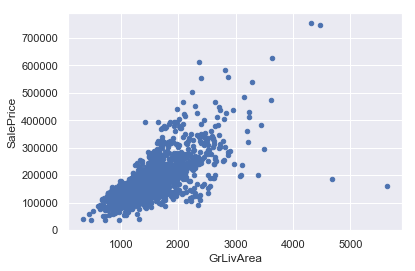

In [226]:
df_train.plot(x='GrLivArea',   
              y='SalePrice',
              kind='scatter');

In [227]:
X = df_train.GrLivArea
X = sms.add_constant(X)
y = df_train.SalePrice

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):          4.52e-223
Time:                        14:02:02   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [228]:
X = df_train.GarageCars
X = sms.add_constant(X)
y = df_train.SalePrice

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1014.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):          2.50e-169
Time:                        14:02:20   Log-Likelihood:                -18159.
No. Observations:                1460   AIC:                         3.632e+04
Df Residuals:                    1458   BIC:                         3.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.062e+04   4102.261     14.777      0.000    5.26e+04    6.87e+04
GarageCars  6.808e+04   2138.212     31.839      0.000    6.39e+04    7.23e+04
==============================================================================
Omnibus:                      590.054   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5085.044
Skew:                           1.649   Prob(JB):                         0.00
Kurtosis:                      11.527   Cond. No.                         6.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Regression

In [229]:
import statsmodels.formula.api as smf

In [230]:
#GrLivArea: Above grade (ground) living area square feet
model = 'SalePrice ~ GrLivArea + OverallQual + TotalBsmtSF + YearBuilt +GarageCars'
smf.ols(formula=model, data=df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     962.4
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:03:13   Log-Likelihood:                -17478.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1454   BIC:                         3.500e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -6.72e+05   8.49e+04     -7.920      0.000   -8.38e+05   -5.06e+05
GrLivArea      50.8315      2.564     19.825      0.000      45.802      55.861
OverallQual  2.039e+04   1156.435     17.633      0.000    1.81e+04    2.27e+04
TotalBsmtSF    29.9779      2.821     10.628      0.000      24.445      35.511
YearBuilt     301.4334     44.591      6.760      0.000     213.964     388.902
GarageCars   1.451e+04   1823.547      7.957      0.000    1.09e+04    1.81e+04
==============================================================================
Omnibus:                      437.776   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45052.102
Skew:                          -0.280   Prob(JB):                         0.00
Kurtosis:                      30.208   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion**: The 5 parameters have low P values, so they are definitely statistically significant & help determine the sale price well!

## Hypothesis Testing

### Hypothesis testing steps
1. State the null and alternative hypotheses (There is an initial research hypothesis of which the truth is unknown) 

2. Choose a significant level $\alpha$ (usually 0.05)  

3. Calculate the test statistic  

4. Compute the p-value  

5. Make your decision

https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

1. There is an initial research hypothesis of which the truth is unknown.

2. The first step is to state the relevant null and alternative hypotheses. This is important, as mis-stating the hypotheses will muddy the rest of the process.


3. The second step is to consider the statistical assumptions being made about the sample in doing the test; for example, assumptions about the statistical independence or about the form of the distributions of the observations. This is equally important as invalid assumptions will mean that the results of the test are invalid.


4. Decide which test is appropriate, and state the relevant test statistic T.


5. Derive the distribution of the test statistic under the null hypothesis from the assumptions. In standard cases this will be a well-known result. For example, the test statistic might follow a Student's t distribution or a normal distribution.


6. Select a significance level (α), a probability threshold below which the null hypothesis will be rejected. Common values are 5% and 1%.


7. The distribution of the test statistic under the null hypothesis partitions the possible values of T into those for which the null hypothesis is rejected—the so-called critical region—and those for which it is not. The probability of the critical region is α.


8. Compute from the observations the observed value tobs of the test statistic T.


9. Decide to either reject the null hypothesis in favor of the alternative or not reject it. The decision rule is to reject the null hypothesis H0 if the observed value tobs is in the critical region, and to accept or "fail to reject" the hypothesis otherwise.

### Hypothesis testing example
The opinion poll shows that the Houses with pools have 55% favor amongst buyers. You want to know if the true percentage is different from 55%.  

Let $p$ be the true love for houses with pools.  

$H_0: p = 0.55$  
$H_a: p \neq 0.55$  

(Null hypothesis: proportion of buyers loving houses with pools is 55%. Alternative hypothesis: People's support for houses with homes is different from 55%, i.e. either greater or less than 55%.)  

In [231]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
fat = pd.read_csv(path+'../train.csv')
fat_t_statistic, fat_two_tailed_p_value = ttest_1samp(fat['0'], 20)
print(f't-test statistic: {fat_t_statistic:.2}')

lower_p_value = fat_two_tailed_p_value / 2
print(f'p-value: {lower_p_value:.2}')

## Probability Part

300 SF Galvanize members were asked about their house preferences in 2017. Of the respondents:
- 33% had children  --> P(children=True) = 0.33
- 13% had children and wanted a basement --> P(children=True, basement=True) = 0.13
- 12% did not have children and wanted a basement --> P(children=False, basement=True) = 0.12

Find the probability that a randomly chosen respondent:
- a) would choose a house with larger basement area;

$$P(\text{basement=True}) = 0.13 (CB) + 0.12 (nCB) = 0.25$$

- b) either has children or would choose a larger basement house (or both).

$$P(\text{children=True OR basement=True}) = 0.33 (C) + 0.25 (CB + nCB) - 0.13 (CB) = 0.33 (C) + 0.12 (nCB) = 0.45$$

Let us write a function that will generate random data according to the statistics describe above. We call our DataFrame `houseprices` and our columns `children` and `house_w_bsement` respectively, to get something like this:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>house_w_bsement</th>
      <th>False</th>
      <th>True</th>
      <th>All</th>
    </tr>
    <tr>
      <th>children</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>False</th>
      <td>164</td>
      <td>36</td>
      <td>200</td>
    </tr>
    <tr>
      <th>True</th>
      <td>61</td>
      <td>39</td>
      <td>100</td>
    </tr>
    <tr>
      <th>All</th>
      <td>225</td>
      <td>75</td>
      <td>300</td>
    </tr>
  </tbody>
</table>

In [233]:
from numpy.random import random_sample

In [234]:
def houseprices_sample(r): 
    if r <= .2:
        return {"children": True, "house_with_basement": False}
    elif r <= .33:
        return {"children": True, "house_with_basement": True}
    elif r <= .45:
        return {"children": False, "house_with_basement": True}
    else:
        return {"children": False, "house_with_basement": False}

In [235]:
houseprices = pd.DataFrame(list(map(houseprices_sample, random_sample(300)))) 
houseprices.head()

,children,house_with_basement
0,True,True
1,True,False
2,True,False
3,False,False
4,False,False


In [242]:
houseprices.shape

(300, 2)

In [239]:
# Note: the returned dict looks like this for each random input:
houseprices_sample(0.5)

{'children': False, 'house_with_basement': False}

In [241]:
# Note: map() gives 300 random numbers between 0-1 as inputs to houseprices_sample function
#       map(func, *iterables) -->  map object
#map(houseprices_sample, random_sample(3))  # --> returns map object
list(map(houseprices_sample, random_sample(3)))  # --> makes list from map object, input for DataFrame

[{'children': True, 'house_with_basement': False},
 {'children': True, 'house_with_basement': True},
 {'children': False, 'house_with_basement': False}]

In [236]:
pd.crosstab(houseprices.children, houseprices.house_with_basement, margins=True)

house_with_basement,False,True,All
children,,,
False,161,41,202
True,62,36,98
All,223,77,300


---

Eli has submitted an offer for a house in SF after doing analysis on given dataset. He estimates that there is an 80 percent chance that he will get the house if there are only 2 other offers on the house, a 40 percent chance if there are 4 offers, and a 10 percent chance if there are greater than 4 offers on the house. He further estimates that the probabilities that the no. of offers will be 2, 4, and more are .7, .2, and .1, respectively.

a) How certain is Eli that his offer  will be accepted?

80% * 0.7 + 40% * 0.2 + 10% * 0.1 = 65%

b)  Given that his offer on house does get accepted, how likely should he feel that there were 2 more offers? 4 more offers? 4 or more offers?

P(2|A) = P(A|2) * P(2) / P(A) = 0.8 * 0.7 / 0.65 = 0.862

P(4|A) = P(A|4) * P(4) / P(A) = 0.4 * 0.2 / 0.65 = 0.123

P(>4|A) = P(A|>4) * P(>4) / P(A) = 0.1 * 0.1 / 0.65 = 0.015

Check: P(2|A) + P(4|A) + P(>4|A) = 0.862 + 0.123 + 0.015 = 1

c) Given that Eli's offer does NOT get accepted (D: declined), how likely should he feel that he had 2 other offers to compete with? 4 other offers to compete with? 4 or more offers to compete with?

P(D) = 1 - P(A) = 1 - 0.65 = 0.35

P(2|D) = P(D|2) * P(2) / P(D) = [1-P(A|2)] * P(2) / P(D) = 0.2 * 0.7 / 0.35 = 0.4

P(4|D) = P(D|4) * P(4) / P(D) = [1-P(A|4)] * P(4) / P(D) = 0.6 * 0.2 / 0.35 = 0.343

P(>4|D) = P(D|>4) * P(>4) / P(D) = [1- P(A|>4)] * P(>4) / P(D) = 0.9 * 0.1 / 0.35 = 0.257

Check: P(2|D) + P(4|D) + P(>4|D) = 0.4 + 0.343 + 0.257 = 1

## Eli's Conclusions:
1) Saleprice is normally distributed, the sale price is related majorly to a few dependent variables.

2) The year the house was built/renovated and the garage area are definitely two of the most obvious determing factors in the Saleprice of the house. 

3) Overall quality of the house, on afterthought, also is a determining factor. Now, one way to actually buy an affordable house could be to buy a house that is not in the best shape, and then work on it, to help bring its price up. In layman's terms, the "fixer-upper."

4) The living area of square footage of the house obviously determines the saleprice on the house. Spouse and I go back and forth on how much space we need. Might be a good idea to look at house prices close to SF as opposed to just within SF, and compare this particular variable and its impact on house price.

5) It is interesting that the subjective analysis I did on spreadsheet with spouse on factors that are important to us, are also the factors that majorly determine the sale price of a house, as per this dataset.